In [4]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [5]:
# File to Load (Remember to Change These)
mobility_file = "Resources/2020_US_Region_Mobility_Report.csv"
covid_cases_file = "Resources/covid_data.csv"

# Read Mobility File and store into Pandas data fram
mobility_data = pd.read_csv(mobility_file,low_memory=False)
case_data = pd.read_csv(covid_cases_file,low_memory=False)

case_data_usa = case_data[case_data['location'] == 'United States']
case_data_usa = case_data_usa[['date','location','total_cases', 'new_cases','total_deaths']]  

mobility_data_usa = mobility_data[mobility_data['country_region'] == 'United States']

mobility_data_usa.rename(columns={'retail_and_recreation_percent_change_from_baseline':'retail_and_recreation',
                             'grocery_and_pharmacy_percent_change_from_baseline':'grocery_and_pharmacy',
                              'parks_percent_change_from_baseline':'parks',
                              'transit_stations_percent_change_from_baseline':'transit_stations',
                              'workplaces_percent_change_from_baseline':'workplaces',
                              'residential_percent_change_from_baseline':'residential'
                             }, inplace=True)
mobility_data_usa = mobility_data_usa[['date','country_region',
                               'retail_and_recreation',
                               'grocery_and_pharmacy',
                               'parks',
                               'transit_stations',
                               'workplaces',
                               'residential']]


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [6]:
mobility_data_usa[['date']] = mobility_data_usa[['date']].apply(pd.to_datetime)
case_data_usa[['date']] = case_data_usa[['date']].apply(pd.to_datetime)
mobility_case_usa = pd.merge(mobility_data_usa,case_data_usa,on='date',how='inner')
mobility_case_usa.dropna(subset = ["new_cases"], inplace=True)
mobility_case_usa.head()

,date,country_region,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,location,total_cases,new_cases,total_deaths
0,2020-02-15,United States,6.0,2.0,15.0,3.0,2.0,-1.0,United States,14.0,0.0,NaN
1,2020-02-16,United States,7.0,1.0,16.0,2.0,0.0,-1.0,United States,14.0,0.0,NaN
2,2020-02-17,United States,6.0,0.0,28.0,-9.0,-24.0,5.0,United States,14.0,0.0,NaN
3,2020-02-18,United States,0.0,-1.0,6.0,1.0,0.0,1.0,United States,14.0,0.0,NaN
4,2020-02-19,United States,2.0,0.0,8.0,1.0,1.0,0.0,United States,14.0,0.0,NaN


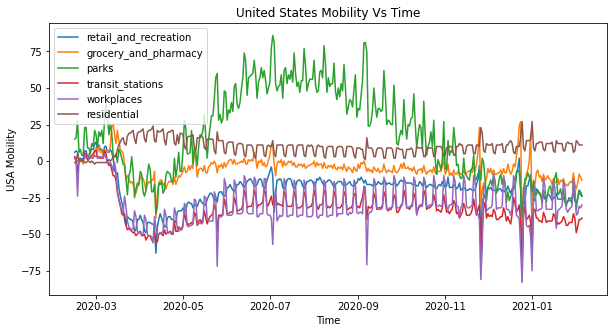

In [7]:
plt.figure(figsize=(10,5))
plt.plot(mobility_case_usa['date'],mobility_case_usa['retail_and_recreation'],label = 'retail_and_recreation')
plt.plot(mobility_case_usa['date'],mobility_case_usa['grocery_and_pharmacy'],label = 'grocery_and_pharmacy')
plt.plot(mobility_case_usa['date'],mobility_case_usa['parks'],label = 'parks')
plt.plot(mobility_case_usa['date'],mobility_case_usa['transit_stations'],label = 'transit_stations')
plt.plot(mobility_case_usa['date'],mobility_case_usa['workplaces'],label = 'workplaces')
plt.plot(mobility_case_usa['date'],mobility_case_usa['residential'],label = 'residential')
plt.legend(loc="upper left")

plt.title("United States Mobility Vs Time")
plt.xlabel("Time")
plt.ylabel("USA Mobility")
plt.show()

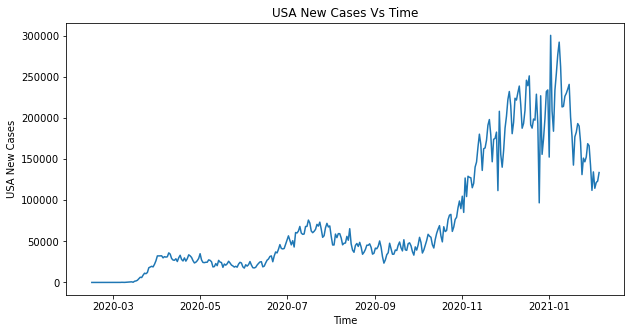

In [8]:
plt.figure(figsize=(10,5))
plt.plot(mobility_case_usa['date'],mobility_case_usa['new_cases'])

plt.title("USA New Cases Vs Time")
plt.xlabel("Time")
plt.ylabel("USA New Cases")
plt.show()


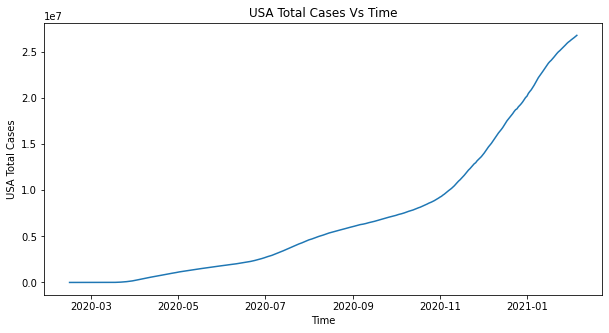

In [9]:
plt.figure(figsize=(10,5))
plt.plot(mobility_case_usa['date'],mobility_case_usa['total_cases'])

plt.title("USA Total Cases Vs Time")
plt.xlabel("Time")
plt.ylabel("USA Total Cases")
plt.show()

In [10]:
correlation = st.pearsonr(mobility_case_usa['new_cases'],mobility_case_usa['retail_and_recreation'])
print(f"The correlation between new_cases and retail_and_recreation is {round(correlation[0],2)}")

correlation = st.pearsonr(mobility_case_usa['new_cases'],mobility_case_usa['grocery_and_pharmacy'])
print(f"The correlation between new_cases and grocery_and_pharmacy is {round(correlation[0],2)}")

correlation = st.pearsonr(mobility_case_usa['new_cases'],mobility_case_usa['parks'])
print(f"The correlation between new_cases and parks is {round(correlation[0],2)}")

correlation = st.pearsonr(mobility_case_usa['new_cases'],mobility_case_usa['transit_stations'])
print(f"The correlation between new_cases and transit_stations is {round(correlation[0],2)}")

correlation = st.pearsonr(mobility_case_usa['new_cases'],mobility_case_usa['workplaces'])
print(f"The correlation between new_cases and workplaces is {round(correlation[0],2)}")

correlation = st.pearsonr(mobility_case_usa['new_cases'],mobility_case_usa['residential'])
print(f"The correlation between new_cases and residential is {round(correlation[0],2)}")

The correlation between new_cases and retail_and_recreation is -0.1
The correlation between new_cases and grocery_and_pharmacy is -0.23
The correlation between new_cases and parks is -0.52
The correlation between new_cases and transit_stations is -0.31
The correlation between new_cases and workplaces is -0.09
The correlation between new_cases and residential is 0.12
